# K Nearest Neighbor

Let's first import the neccessary libraries

In [1]:
import pandas as pd
import os
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

Take a look at the business data first.

In [2]:
os.chdir("D:\Yelp data")
yelp_business=pd.read_json("business.json",lines=True)
yelp_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


We can see that it is a pretty comprehensive dataset in terms of describing the businesses that have records on Yelp. Notice two important columns: **Name** and **business_id**; **name** gives the name of the business and **business_id** is the unique identifier for us to use. Later I will use **business_id** to join other tables 

<br>

First, since this study focuses on the restaurant, while the dataset provides business for all sort of service (Notices the **categories** columns have all sort of business), let first filter out all the restaurants in this dataset

In [3]:
restaurant=yelp_business[yelp_business.categories.str.contains("Restaurant")==1]
restaurant.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV


Let's group the restaurant dataset by States to see what happens.

In [4]:
restaurant.groupby("state").agg({"business_id":"count"}).sort_values("business_id",ascending=False)

,business_id
state,
ON,14832
AZ,11473
NV,7788
QC,5622
OH,5522
NC,4327
PA,4002
AB,3035
WI,1703


Oops! I was looking for restaurant near Boston, MA (since I live here); but apparently that data was not provided by Yelp. Well, I guess I have to change my plan. Seems that Yelp has provided business data from Ontario, Canada. Let's actually change our mind see what our Canadian neighbors like in terms of their food options.

Let's recreate another dataset that includes all the restaurants from Ontario,Canada and rename it to Ontario_restaurant.

In [5]:
Ontario_restaurant=yelp_business[yelp_business.categories.str.contains("Restaurant")==1][yelp_business["state"]=="ON"]
Ontario_restaurant.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
29,1170 Queen Street W,"{'WiFi': 'u'no'', 'BikeParking': 'True', 'Rest...",NDuUMJfrWk52RA-H-OtrpA,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,"{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",1,43.642889,-79.425429,Bolt Fresh Bar,M6J 1J5,57,3.0,ON
32,1051 Bloor Street W,"{'BusinessParking': '{'garage': False, 'street...",SP_YXIEwkFPPl_9anCYmpQ,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,"{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",0,43.660494,-79.432099,The Steady Cafe & Bar,M6H 1M4,29,3.5,ON
50,582 College Street,"{'Alcohol': 'u'full_bar'', 'Caters': 'False', ...",mlHC2XcU9Bows6cnYEmRgg,"Restaurants, Breakfast & Brunch, Bars, Modern ...",Toronto,"{'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',...",0,43.655420,-79.413352,Mad Crush Wine Bar,M6G 1B3,9,4.0,ON
61,"17205 Leslie Street, Unit 2","{'RestaurantsAttire': ''casual'', 'Restaurants...",6l00a9Gkxkcp_y-GPjYBiw,"Fish & Chips, Restaurants",Newmarket,None,1,44.058765,-79.429115,J's Fish & Chips,L3Y 8Y8,12,4.5,ON


<br>

Take look at some summary stats on the business Dataset:

There are 14832 restaurants from Ontario available; ratings is breakdown from 1 to 5; the average stars on these restaurants are 3.37.

In [6]:
Ontario_restaurant.describe()

,is_open,latitude,longitude,review_count,stars
count,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000
mean,0.708401,43.718635,-79.429537,37.576996,3.372674
std,0.454514,0.105536,0.150760,67.842949,0.765367
min,0.000000,43.450082,-79.947053,3.000000,1.000000
25%,0.000000,43.650561,-79.489337,6.000000,3.000000
50%,1.000000,43.680204,-79.403949,15.000000,3.500000
75%,1.000000,43.787950,-79.359418,41.000000,4.000000
max,1.000000,44.147909,-78.900077,2121.000000,5.000000


Let's pickup the most important columns for this study

In [7]:
Ontario_restaurant=Ontario_restaurant[["business_id","categories","city","name","postal_code","review_count","stars"]]
Ontario_restaurant=Ontario_restaurant.set_index("business_id")
Ontario_restaurant.head()

,categories,city,name,postal_code,review_count,stars
business_id,,,,,,
QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,Emerald Chinese Restaurant,L5R 3E7,128,2.5
NDuUMJfrWk52RA-H-OtrpA,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,Bolt Fresh Bar,M6J 1J5,57,3.0
SP_YXIEwkFPPl_9anCYmpQ,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,The Steady Cafe & Bar,M6H 1M4,29,3.5
mlHC2XcU9Bows6cnYEmRgg,"Restaurants, Breakfast & Brunch, Bars, Modern ...",Toronto,Mad Crush Wine Bar,M6G 1B3,9,4.0
6l00a9Gkxkcp_y-GPjYBiw,"Fish & Chips, Restaurants",Newmarket,J's Fish & Chips,L3Y 8Y8,12,4.5


------------
Next, let's look at some user's review

In [8]:
review=pd.read_csv("yelp_review.csv")
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In the review database, we are given the review id, user id and the business id, along with the ratings on the particular restaurant and the review text.

---------------
Next, let's take a look at the user data

In [9]:
user=pd.read_csv("yelp_user.csv")
user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


Now, let's join the data together to make it useful dataset for the analysis. First, let's pick up the important columns in each database and get rid of the ones that is not useful in the context of this study.

In [10]:
review=review[["review_id","user_id","business_id","stars","useful","funny","cool"]]
user=user[["user_id","review_count","useful","funny","cool","fans"]]

Join review to restaurant data on **business id** and join review on user data on **user id**

In [12]:
final_dataset=review.join(Ontario_restaurant,how="inner",on="business_id",lsuffix="_review",rsuffix="_business")
final_dataset=final_dataset.join(user.set_index("user_id"),how="inner",on="user_id",lsuffix="_final",rsuffix="_user")
final_dataset.head()

,review_id,user_id,business_id,stars_review,useful_final,funny_final,cool_final,categories,city,name,postal_code,review_count_final,stars_business,review_count_user,useful_user,funny_user,cool_user,fans
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,0,0,2,"Restaurants, Vietnamese, Thai",Toronto,Little Coxwell Vietnamese & Thai Cuisine,M4C 3G5,115,4.0,359,79,7,22,8
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,1,0,0,"Food, Restaurants, Coffee & Tea",Toronto,Broadview Espresso,M4K 2P9,65,4.0,359,79,7,22,8
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,1,0,0,"Restaurants, Poutineries, Fast Food",Toronto,Poutini's House of Poutine,M6J 1H9,268,3.5,359,79,7,22,8
10,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,1,0,0,"Canadian (New), Bars, American (New), Chinese,...",Toronto,Milliken Bar & Restaurant,M1S 3T6,36,3.5,359,79,7,22,8
11,PdZ_uFjbbkjtm3SCY_KrZw,u0LXt3Uea_GidxRW1xcsfg,XWTPNfskXoUL-Lf32wSk0Q,3,5,0,1,"Restaurants, Diners, Breakfast & Brunch",Toronto,Rosedale Diner,M4W 2L9,80,3.5,359,79,7,22,8


Cool now we have a dataset that have review_id,user_id and business id with restaurant name and user's profile. I will save this dataset for later use.

In [13]:
final_dataset.to_csv("yelp_train.csv")

Now let's take a look at the average rating for all the Ontario restaurants in this database.

Average rating for restaurant in Ontario is 3.55


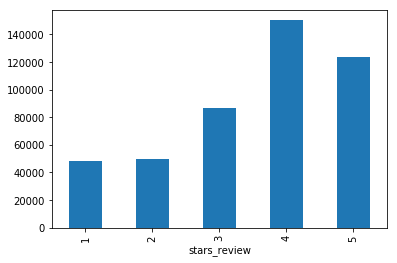

In [17]:
final_dataset.groupby("stars_review").count()["user_id"].plot(kind="bar")
avg_rating=final_dataset["stars_review"].mean()
print("Average rating for restaurant in Ontario is {}".format(round(avg_rating,2)))

Let's look at the distribution of the ratings here. Well, not really anything surprising. The bell shaped curve is slights tweaked toward right, but since we are not making any underlying assumptions about the distribution because KNN is non-parametric, so the distribution does not really matter in the case.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219B1B0CAC8>]],
      dtype=object)

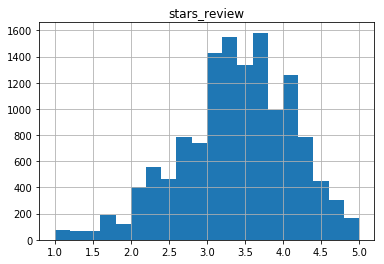

In [15]:
final_dataset.groupby("business_id").agg({"stars_review":"mean"}).hist(bins=20)

Now, let's look at the user behavior. I want to count that for each user that has any records of review, how many they have put in, and here is the result.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219B1C072B0>]],
      dtype=object)

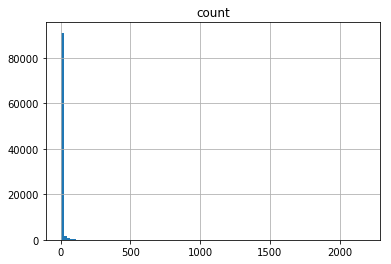

In [18]:
review_count=pd.DataFrame(final_dataset.groupby("user_id",as_index=False).size(),columns=["count"]).sort_values("count",ascending=False)

pd.DataFrame.hist(review_count,bins=100)


Well, seems most people have only put in one or few comments for Yelp. Not entirely surprising.


-------
Finally let's jump into the KNN model. First, we need to fill in the empty space with zero and transform the table into $ M*N $ matrix, for M businesses and N distinct users.

In [ ]:
Ontario_restaurant_mat=final_dataset.pivot(index="business_id",columns="user_id",values="stars_review").fillna(0)
Ontario_restaurant_mat.head()

Finally, let's implement the knn model here. Standard way of using cosine distance to compute the distance.

In [39]:
def knn_model():
    model=NearestNeighbors(metric="cosine",algorithm="brute",n_neighbors=20,n_jobs=-1)
    return model
model=knn_model()

<br>

Define the function for making knn recommendations

In [53]:
def knn_recommandation(data,fav_restaurant,n_recommendations=10,weighted=False):
    """
    using yelp data to recommand restaurant
    
    knn_approach

    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: yelp restaurant data converted to matrix:
          row as business identifier
          column as user identifier

    input: favorite restaurant

    n_recommendations: int, top n recommendations
    """
    if 'model' in globals():
        global model
    else:
        model=knn_model()
    # fit
    model.fit(data)
    print("Find restaurants similar to {} based on user input".format(fav_restaurant))
    # inference
    print('Here are the top ten recommandations:')
    print('......\n')
    business_id=Ontario_restaurant[Ontario_restaurant["name"]==fav_restaurant].index[0]
    distances, indices = model.kneighbors(data.filter(like=business_id,axis='index'), n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # print recommendations
    print('Recommendations for {}:'.format(my_favorite))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1,list(Ontario_restaurant["name"][Ontario_restaurant.index==Ontario_restaurant_mat.index[idx]])[0], dist))

Cool, now we have the model. Let's put in a random restaurant see what it provides. I picked a random Chinese restaurant as my favourite restaurant, and here is the result!

In [54]:
my_favorite = 'Emerald Chinese Restaurant'

knn_recommandation(
    data=Ontario_restaurant_mat,
    fav_restaurant=my_favorite)

Find restaurants similar to Emerald Chinese Restaurant based on user input
Here are the top ten recommandations:
......

Recommendations for Emerald Chinese Restaurant:
1: Kobe Sushi, with distance of 0.8729435047925027
2: Wonton Chai Noodle, with distance of 0.8717288246806103
3: Chako, with distance of 0.8693951111786435
4: Congee Dynasty, with distance of 0.8658084838350306
5: Dynasty BBQ, with distance of 0.861539455352046
6: McDonald's, with distance of 0.8548495321630935
7: Wild Wing, with distance of 0.854550339648705
8: Blue Lagoon Seafood Master, with distance of 0.8544684454549096
9: Viet Thai Restaurant, with distance of 0.8378466819037798
10: Happy Jade Seafood Chinese Restaurant, with distance of 0.7963704755081871


------------------------------

Well, this really fells like very legid recommendations. Given that my favourite restaurant is a Chinese restaurant, and what Knn offers me all some similar Asian kitchens. For example, **Kobe Sushi** (Japanese), **Wonton Chai Noodle** (Sound's like Hongkong style), **Viet Thai Restaurant** (Vietnamese), and **Happy Jade Seafood Chinese Restaurant** (Chinese)

-----------------------------


-------------------------------
Take another example, here is I find a restaurant that seems more European; let's find out what KNN would offer in this case

--------------------------------

In [55]:
my_favorite = "J's Fish & Chips"


knn_recommandation(
    data=Ontario_restaurant_mat,
    fav_restaurant=my_favorite)

Find restaurants similar to J's Fish & Chips based on user input
Here are the top ten recommandations:
......

Recommendations for J's Fish & Chips:
1: Taza Xpress, with distance of 0.9176311421402781
2: Quesada Burritos and Tacos, with distance of 0.9038392772773323
3: Twisted Fork, with distance of 0.896251268968906
4: Yamato Sushi, with distance of 0.8955883310348774
5: St. Louis Bar & Grill, with distance of 0.8916467512822909
6: Otaru Sushi, with distance of 0.8879336370638948
7: Bakery Garden, with distance of 0.8687116746261058
8: Sunset Grill, with distance of 0.8267602678311907
9: Mrs. Greek Souvlaki Express, with distance of 0.7920633893787208
10: The Prince Albert Pub, with distance of 0.7846347538730261


Again, this looks not bad. We received a few different Western Style restaurants based on our input.


Next, we will use pyspark to run Explicit Alternating Least Square (ALS) and compare the results to the results to KNN model.